In [14]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import Model
import Training
import Simulation

## Model Comparison

### Effect of Window Size

In [15]:
# Fixed Parameters for Comparison
layer_struct = (32, 64, 128, 128, 64, 32)
states_initial = np.array([
    [np.pi/5, 2.5],
    [np.pi/6, -0.5],
    [-np.pi/1.5, 0],
    [-np.pi/2, -1.5],
])
length = 1.0
batch_size = 512
time_max = 40
dt = 0.01
epochs = 50
activation_function = nn.Softplus()

In [16]:
# Creating True Data

# Choose a new initial state for fair evaluation
test_initial_state = np.array([np.pi/2, 2])  # Different from training init

theta_arr, theta_dot_arr, time_arr = Simulation.Solver(
    Simulation.Euler_Lagrange_Equation,
    test_initial_state[0], test_initial_state[1],
    time_max, dt, length
)

test_states = np.stack([theta_arr, theta_dot_arr], axis=-1)  # [T, 2]

In [17]:
# Testing Model

device = torch.device("cuda" if torch.cuda.is_available() else
                      "mps" if torch.backends.mps.is_available() else "cpu")


theta = torch.tensor([[test_states[0, 0]]], device=device, dtype=torch.float32)      # shape [1, 1]
theta_dot = torch.tensor([[test_states[0, 1]]], device=device, dtype=torch.float32)  # shape [1, 1]

In [18]:
window_1_pred = []
window_3_pred = []
window_5_pred = []
window_10_pred = []

In [19]:
# Training Models based on different Window Sizes
LNN_window_1 = Model.LNN(hidden_layers=layer_struct,activation_fn=activation_function)
Training.LNN_Workout(
    lnn_model=LNN_window_1, states_initial=states_initial, length = length, t_max=time_max, dt=dt, window_size = 1, batch_size=batch_size, epochs=epochs, resume = False)

Starting Training. 
 7.. 8.. 9.. 10.. A Machine here
Epoch 1/50 - Loss: 0.00313924
Epoch 6/50 - Loss: 0.00076734
Epoch 11/50 - Loss: 0.00072658
Epoch 16/50 - Loss: 0.00071587
Epoch 21/50 - Loss: 0.00070962
Epoch 26/50 - Loss: 0.00070651
Epoch 31/50 - Loss: 0.00070191
Epoch 36/50 - Loss: 0.00069883
Epoch 41/50 - Loss: 0.00069742
Epoch 46/50 - Loss: 0.00069590
Saved final checkpoint to saves/save_latest.pth (loss=0.00069454)


In [20]:
LNN_window_1 = LNN_window_1.to(device)
LNN_window_1.eval()
for i in range(len(test_states) - 1):
    theta, theta_dot = Simulation.rk4_step_LNN(Model.LNN_Euler_Lagrange, LNN_window_1, theta, theta_dot, dt)
    # theta = theta.detach()
    # theta_dot = theta_dot.detach()
    window_1_pred.append([float(theta.item()), float(theta_dot.item())])

In [21]:

LNN_window_3 = Model.LNN(hidden_layers=layer_struct,activation_fn=activation_function)
Training.LNN_Workout(
    lnn_model=LNN_window_3, states_initial=states_initial, length = length, t_max=time_max, dt=dt, window_size = 3, batch_size=batch_size, epochs=epochs, resume = False)

Starting Training. 
 7.. 8.. 9.. 10.. A Machine here
Epoch 1/50 - Loss: 0.02175938
Epoch 6/50 - Loss: 0.00308952
Epoch 11/50 - Loss: 0.00235251
Epoch 16/50 - Loss: 0.00228077
Epoch 21/50 - Loss: 0.00223929
Epoch 26/50 - Loss: 0.00220380
Epoch 31/50 - Loss: 0.00217628
Epoch 36/50 - Loss: 0.00215242
Epoch 41/50 - Loss: 0.00212967
Epoch 46/50 - Loss: 0.00211120
Saved final checkpoint to saves/save_latest.pth (loss=0.00209976)


In [22]:
LNN_window_3 = LNN_window_3.to(device)
LNN_window_3.eval()
for i in range(len(test_states) - 1):
    theta, theta_dot = Simulation.rk4_step_LNN(Model.LNN_Euler_Lagrange, LNN_window_3, theta, theta_dot, dt)
    # theta = theta.detach()
    # theta_dot = theta_dot.detach()
    window_3_pred.append([float(theta.item()), float(theta_dot.item())])

In [23]:

LNN_window_5 = Model.LNN(hidden_layers=layer_struct,activation_fn=activation_function)
Training.LNN_Workout(
    lnn_model=LNN_window_5, states_initial=states_initial, length = length, t_max=time_max, dt=dt, window_size = 5, batch_size=batch_size, epochs=epochs, resume = False)

Starting Training. 
 7.. 8.. 9.. 10.. A Machine here
Epoch 1/50 - Loss: 2.00908442
Epoch 6/50 - Loss: 0.10074080
Epoch 11/50 - Loss: 0.10063726
Epoch 16/50 - Loss: 0.10049911
Epoch 21/50 - Loss: 0.10033049
Epoch 26/50 - Loss: 0.10013135
Epoch 31/50 - Loss: 0.09990444
Epoch 36/50 - Loss: 0.09965100
Epoch 41/50 - Loss: 0.09937142
Epoch 46/50 - Loss: 0.09906449
Saved final checkpoint to saves/save_latest.pth (loss=0.09880072)


In [24]:
LNN_window_5 = LNN_window_5.to(device)
LNN_window_5.eval()
for i in range(len(test_states) - 1):
    theta, theta_dot = Simulation.rk4_step_LNN(Model.LNN_Euler_Lagrange, LNN_window_5, theta, theta_dot, dt)
    # theta = theta.detach()
    # theta_dot = theta_dot.detach()
    window_5_pred.append([float(theta.item()), float(theta_dot.item())])

In [25]:

LNN_window_10 = Model.LNN(hidden_layers=layer_struct,activation_fn=activation_function)
Training.LNN_Workout(
    lnn_model=LNN_window_10, states_initial=states_initial, length = length, t_max=time_max, dt=dt, window_size = 10, batch_size=batch_size, epochs=epochs, resume = False)

Starting Training. 
 7.. 8.. 9.. 10.. A Machine here
Epoch 1/50 - Loss: 0.27152551
Epoch 6/50 - Loss: 0.00978572
Epoch 11/50 - Loss: 0.00872338
Epoch 16/50 - Loss: 0.00815728
Epoch 21/50 - Loss: 0.00784410
Epoch 26/50 - Loss: 0.00762157
Epoch 31/50 - Loss: 0.00744968
Epoch 36/50 - Loss: 0.00722096
Epoch 41/50 - Loss: 0.00708907
Epoch 46/50 - Loss: 0.00714076
Saved final checkpoint to saves/save_latest.pth (loss=0.00695732)


In [26]:
LNN_window_10 = LNN_window_10.to(device)
LNN_window_10.eval()
for i in range(len(test_states) - 1):
    theta, theta_dot = Simulation.rk4_step_LNN(Model.LNN_Euler_Lagrange, LNN_window_10, theta, theta_dot, dt)
    # theta = theta.detach()
    # theta_dot = theta_dot.detach()
    window_10_pred.append([float(theta.item()), float(theta_dot.item())])

In [30]:

window_1_states = np.array(window_1_pred)
window_3_states = np.array(window_3_pred)
window_5_states = np.array(window_5_pred)
window_10_states = np.array(window_10_pred)
print(window_1_states.shape, window_3_states.shape, window_5_states.shape, window_10_states.shape)

(3999, 2) (3999, 2) (3999, 2) (3999, 2)


In [28]:
true_states = test_states[1:len(window_1_states)+1]  # Align shapes

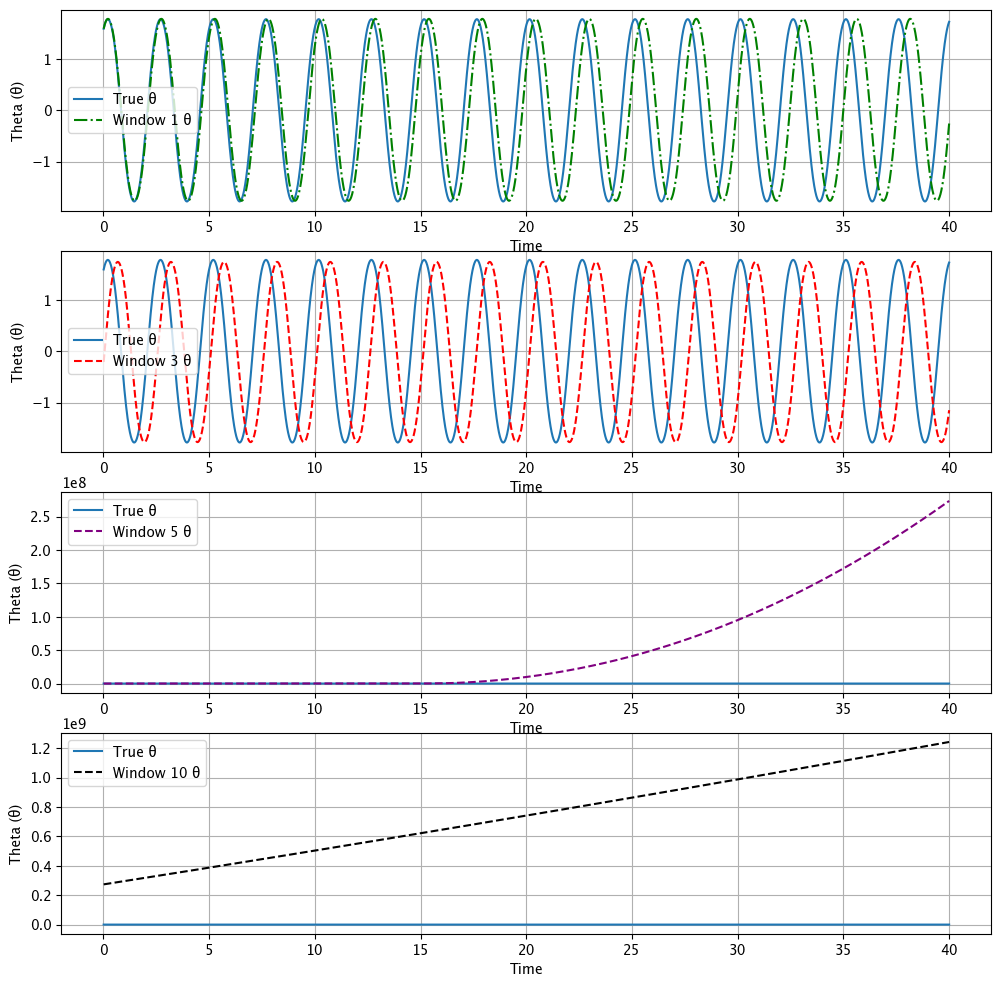

In [29]:
plt.figure(figsize=(12, 12))

plt.subplot(4, 1, 1)
plt.plot(time_arr[1:len(true_states)+1], true_states[:, 0], label='True θ')
plt.plot(time_arr[1:len(true_states)+1], window_1_states[:, 0], '-.',c = "green", label='Window 1 θ')
plt.xlabel("Time")
plt.ylabel("Theta (θ)")
plt.grid(True)
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(time_arr[1:len(true_states)+1], true_states[:, 0], label='True θ')
plt.plot(time_arr[1:len(true_states)+1], window_3_states[:, 0], '--',c = "red",  label='Window 3 θ')
plt.xlabel("Time")
plt.ylabel("Theta (θ)")
plt.grid(True)
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(time_arr[1:len(true_states)+1], true_states[:, 0], label='True θ')
plt.plot(time_arr[1:len(true_states)+1], window_5_states[:, 0], '--',c = "purple",  label='Window 5 θ')
plt.xlabel("Time")
plt.ylabel("Theta (θ)")
plt.grid(True)
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(time_arr[1:len(true_states)+1], true_states[:, 0], label='True θ')
plt.plot(time_arr[1:len(true_states)+1], window_10_states[:, 0], '--',c = "black", label='Window 10 θ')
plt.xlabel("Time")
plt.ylabel("Theta (θ)")
plt.grid(True)
plt.legend()
plt.show()